### Part 1 ‑ Exploratory data analysis


The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [33]:
#load the necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [19]:
#read the json file
data = pd.read_json("logins.json")
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [20]:
#Lets explore the data
data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [22]:
data.isna().any()

login_time    False
dtype: bool

In [23]:
data.dtypes

login_time    datetime64[ns]
dtype: object

In [27]:
data.duplicated().sum()

877

In [28]:
#setting the index with datetime column
data.set_index('login_time',inplace = True)
data['count'] = 1
data.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [29]:
#resampling the data based on 15 minutes time interval
data = data.resample('15T').agg({'count':'sum'})
data.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### Visualizing the logings patters/trends

#### Histogram

Text(0.5, 1.0, 'login_time counts per 15 minutes time interval')

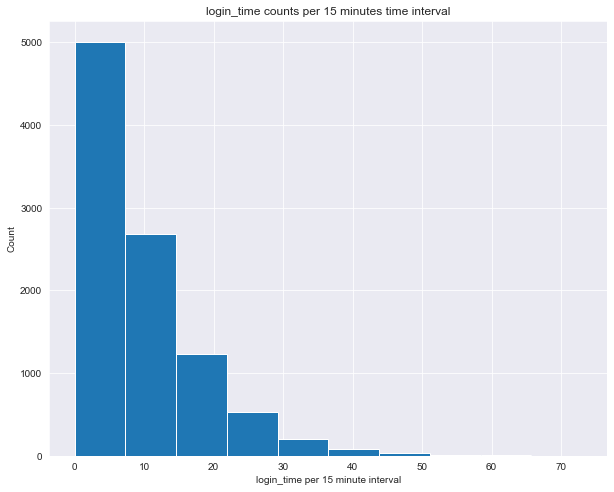

In [42]:
#Visualize the patterns
data.hist(figsize  =(10,8))
plt.xlabel("login_time per 15 minute interval")
plt.ylabel("Count")
plt.title("login_time counts per 15 minutes time interval")

Summary findings:

- Most of the login_time per 15 minute time interval are between range 0-20.


In [97]:
data['day_of_week'] = data.index.day_name()
data['Month'] = data.index.month
data['hour'] = data.index.hour
data['day'] = data.index.day
data.sort_index(inplace = True)

In [98]:
data.head()

,count,day_of_week,Month,hour,day
login_time,,,,,
1970-01-01 20:00:00,2,Thursday,1,20,1
1970-01-01 20:15:00,6,Thursday,1,20,1
1970-01-01 20:30:00,9,Thursday,1,20,1
1970-01-01 20:45:00,7,Thursday,1,20,1
1970-01-01 21:00:00,1,Thursday,1,21,1


### Plot Time Series data

<AxesSubplot:title={'center':'logins at 15 minute time interval counts per hour over entire time frame'}, xlabel='login_time'>

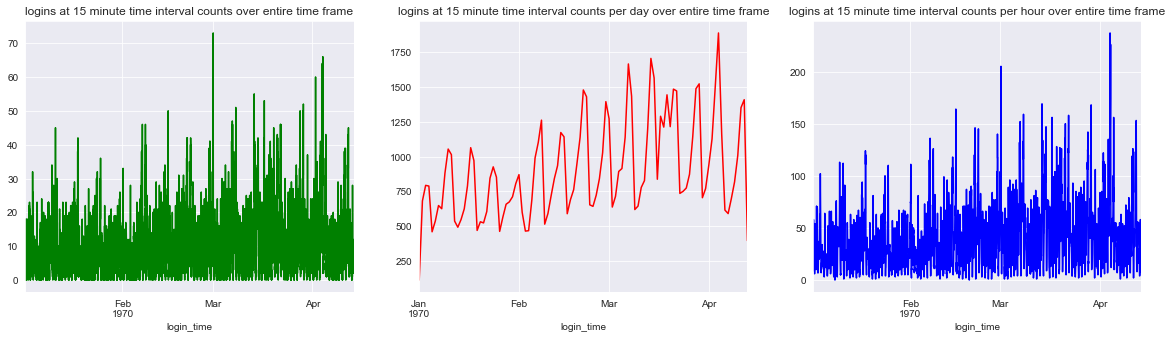

In [140]:
plt.figure(figsize = (20,5))

ax1 = plt.subplot(1,3,1)
data['count'].plot(ax = ax1,
                   color = 'green',
                   title = "logins at 15 minute time interval counts over entire time frame")

ax2 = plt.subplot(1,3,2)
data['count'].resample('D').sum().plot(ax = ax2,
                   color = 'red',
                   title = "logins at 15 minute time interval counts per day over entire time frame")


ax3 = plt.subplot(1,3,3)
data['count'].resample('H').sum().plot(ax = ax3,
                   color = 'blue',
                   title = "logins at 15 minute time interval counts per hour over entire time frame")



### Summary findings:

- logins at 15 minute time interval counts over entire time frame has no trend, seasonality or cyclic behavior. 
- logins at 15 minute time interval counts per day over entire time frame has strong seasonality,slight increasing trend, as well as some strong cyclic behavior.
- logins at 15 minute time interval counts per hour over entire time frame has no trend,seasonality or cyclic behavior. 


### Investigation cycle patterns

Text(0.5, 1.0, 'login counts per month over entire time frame')

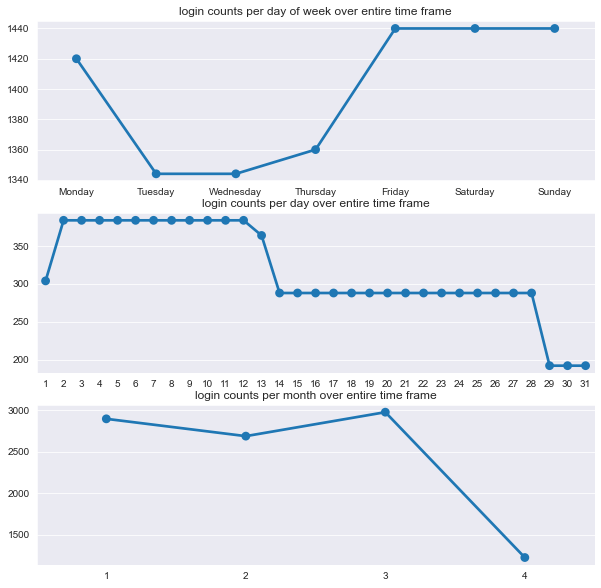

In [145]:
plt.figure(figsize = (10,10))

ax1 = plt.subplot(3,1,1)
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.pointplot(x = data['day_of_week'].value_counts().index, 
              y = data['day_of_week'].value_counts().values, 
              order = Days,ax = ax1)
plt.title("login counts per day of week over entire time frame")

ax2 = plt.subplot(3,1,2)
sns.pointplot(x = data['day'].value_counts().index, 
              y = data['day'].value_counts().values, 
              ax = ax2)
plt.title("login counts per day over entire time frame")


ax3 = plt.subplot(3,1,3)
sns.pointplot(x = data['Month'].value_counts().index, 
              y = data['Month'].value_counts().values, 
              ax = ax3)
plt.title("login counts per month over entire time frame")


### Summary Findings:

- login counts per day of week over entire time frame shows that logins are at lowest on Tuesday,Wednesday and gradually raise to its peak on Saturday.
- login counts per day of month showa that logins are at its peak in the first week and gradually started decreasing at the end of second week and then at ite lowest on days of month end.
- login counts per month shows logins are peak at March month over the entire time frame of dataset.

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

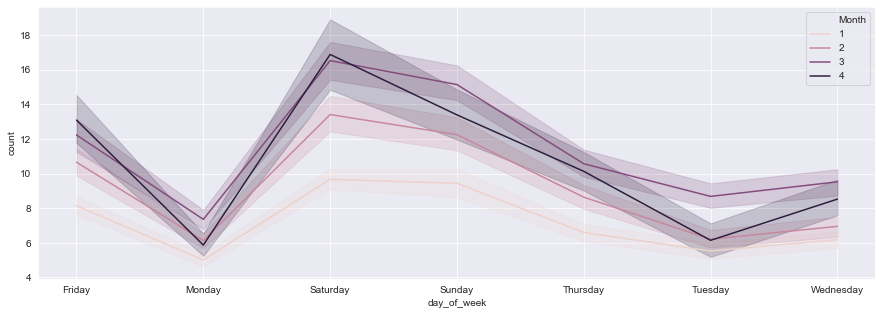

In [139]:
plt.figure(figsize = (15,5))
sns.lineplot(y = 'count', x ='day_of_week', hue = 'Month',data = data)

Text(0.5, 1.0, 'Daily cycle of login counts')

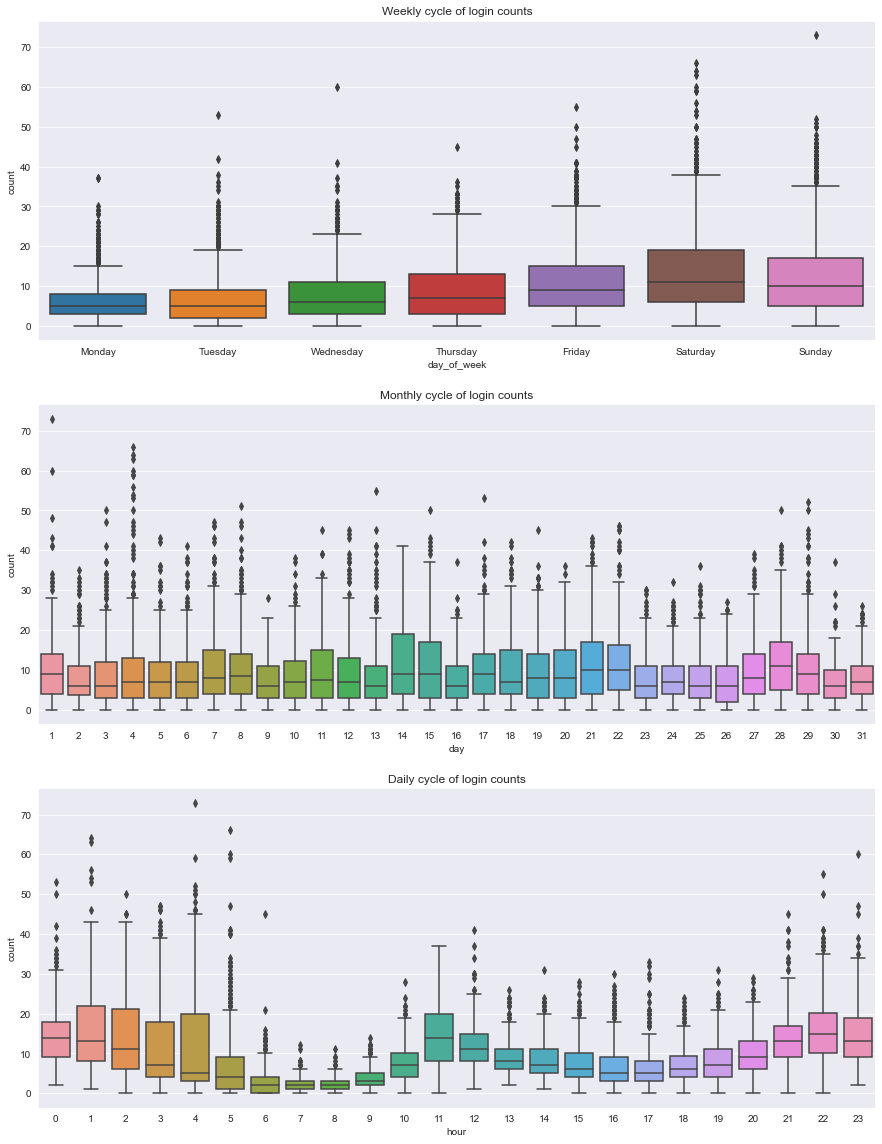

In [161]:
#Lets visualize the boxplots

plt.figure(figsize = (15,20))

ax1 = plt.subplot(3,1,1)
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.boxplot(x = 'day_of_week', y = 'count', data = data,order = Days,ax = ax1)
plt.title("Weekly cycle of login counts")

ax2 = plt.subplot(3,1,2)
sns.boxplot(x = 'day', y = 'count', data = data,ax = ax2)
plt.title("Monthly cycle of login counts")


ax3 = plt.subplot(3,1,3)
sns.boxplot(x = 'hour', y = 'count', data = data,ax = ax3)
plt.title("Daily cycle of login counts")

### Summary findings:

- Weekly cycle of login counts shows that login counts are at its lowest on Monday, Tuesday and at its peak on Saturday each week.
- Monthly cycle of login counts shows that login counts are peak at 28th day of each month.
- Daily cycle of login counts shows that login counts are at lowest from 6 a.m to 9 a.m and gardually raises to its peak at 11 p.m each day.

### Trends over time

Text(0.5, 1.0, 'login counts with respect to week')

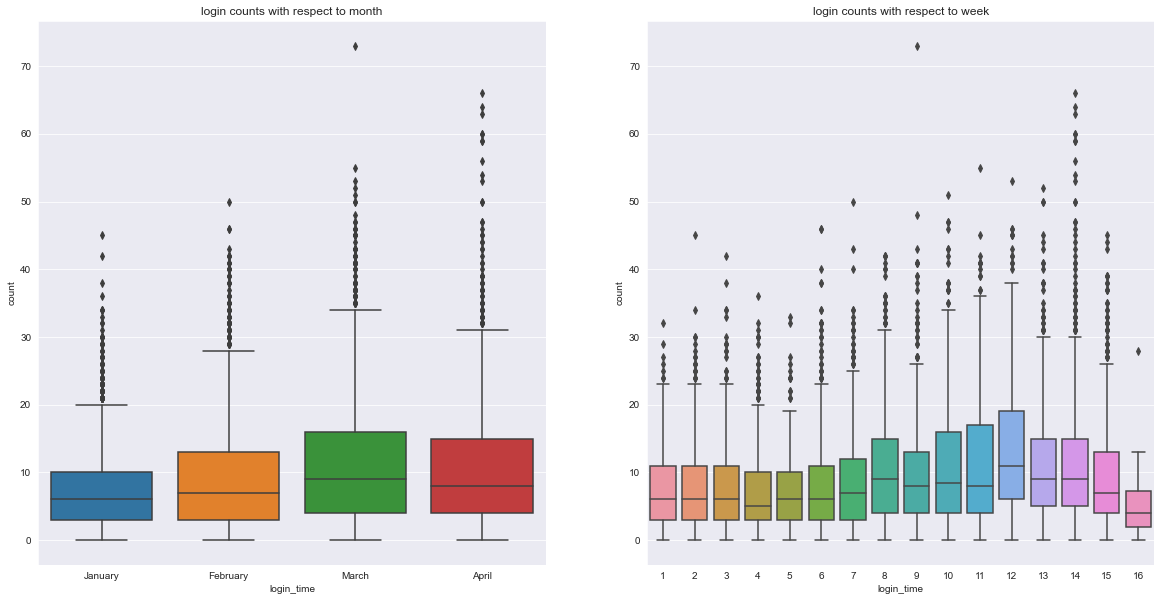

In [167]:
plt.figure(figsize = (20,10))

ax1 = plt.subplot(1,2,1)
sns.boxplot(x = data.index.month_name(), y = 'count', data = data,ax = ax1)
plt.title("login counts with respect to month")

ax2 = plt.subplot(1,2,2)
sns.boxplot(x = data.index.week, y = 'count', data = data,ax = ax2)
plt.title("login counts with respect to week")


### Summary Findings:

- There is steady increase in login counts from January to March and then dropped in April. The weekly login counts proved that visually by showing a drop in the last weeks in the weekly count chart.